<a href="https://colab.research.google.com/github/M-Rathnayake/Titanic-ML-from-disaster/blob/main/train_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic - Machine Learning project

#Importing data using pandas library

In [23]:
import pandas as pd
train_df= pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identifying missing values (seaborn to visualize)

In [24]:
#identifying missing values
missing = train_df.isnull().sum()
print(missing[missing>0])

Age         177
Cabin       687
Embarked      2
dtype: int64


<Axes: >

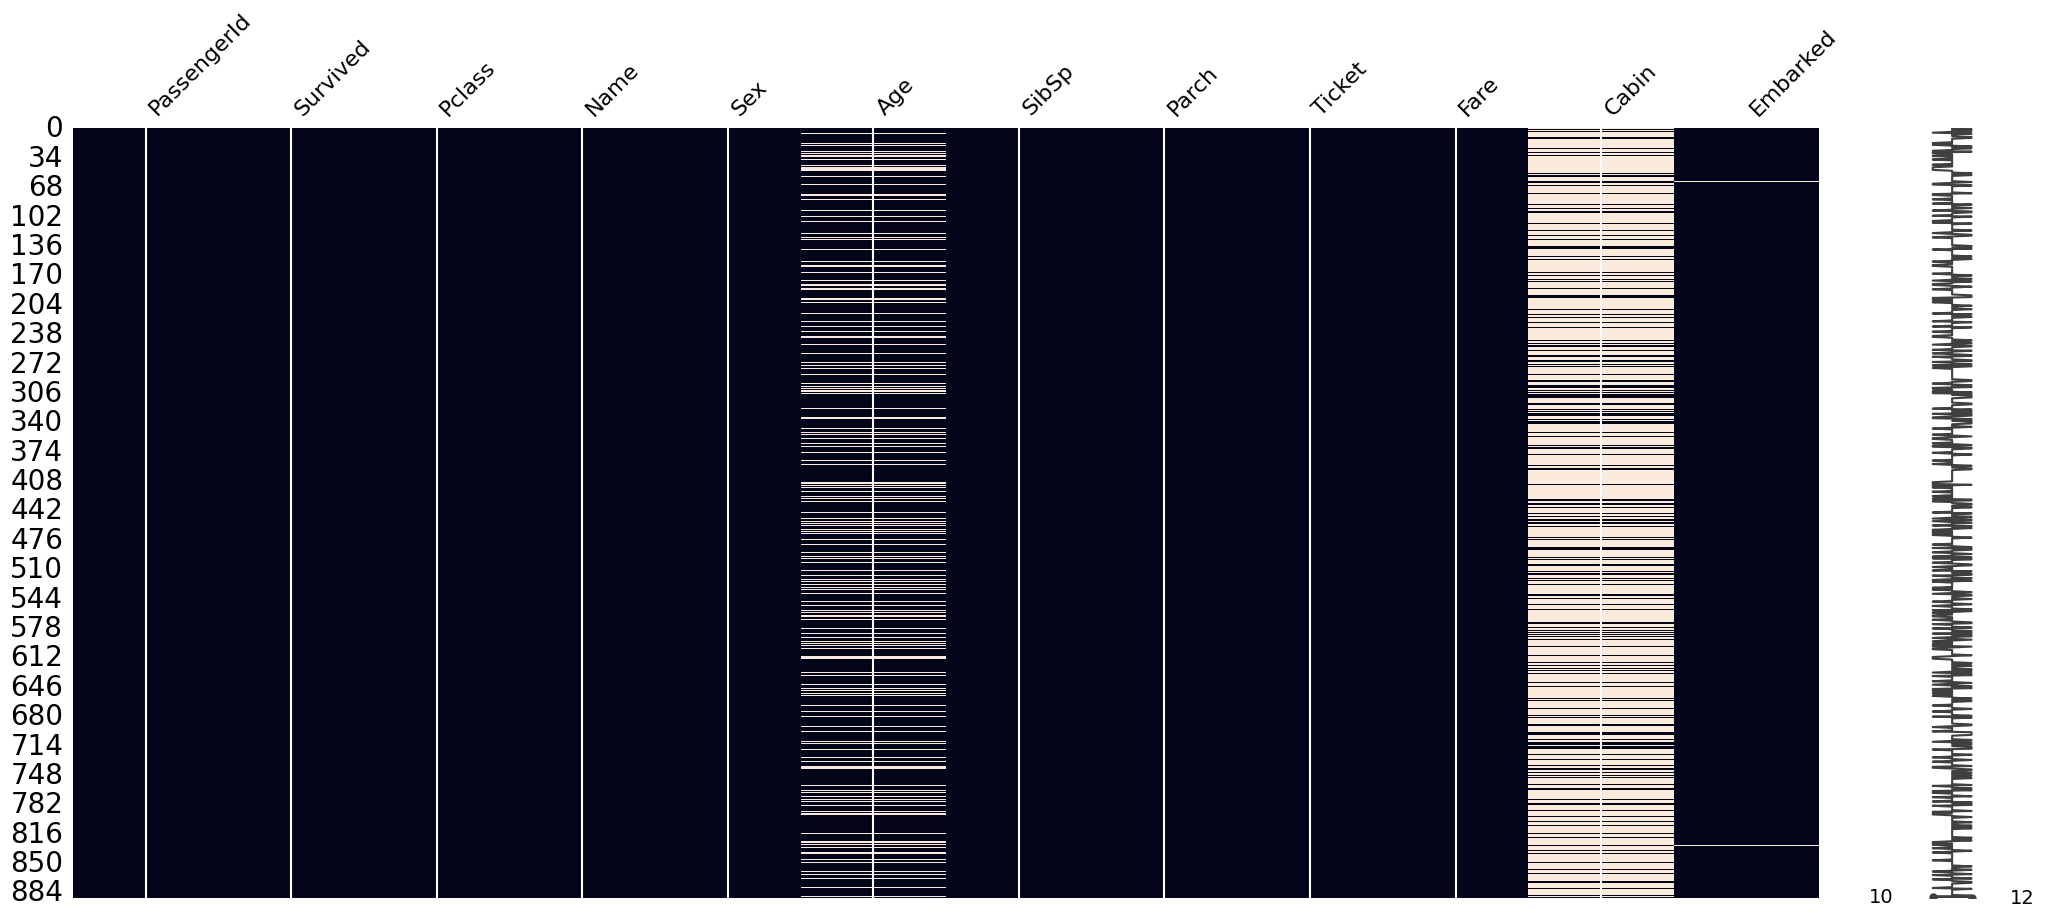

In [25]:
#analyzing the patterns of misssing values by using a chart
#this is done as sum of missing values is greater than 5
import missingno as msno
msno.matrix(train_df)

import seaborn as sns
sns.heatmap(train_df.isnull(),cbar=False)

#Handling missing values for "Age" by imputing them with the median

In [26]:
#Impute missing 'Age' values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

#Verify that missing 'Age' values have been imputed
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-26-cd65f4dbf2d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


#Handling missing values for Cabin - Dropped the column due to missing values over 77%

In [27]:
#drop cabin column
train_df.drop('Cabin',axis=1,inplace=True)

#verify that missing 'Cabin' values have been dropped
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


#Handling missing values for "Embarked" - impute with the mode

In [28]:
#Impute missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

#Verify that missing 'Embarked' values have been imputed
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-28-18f35c96945f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


#Handling outliers

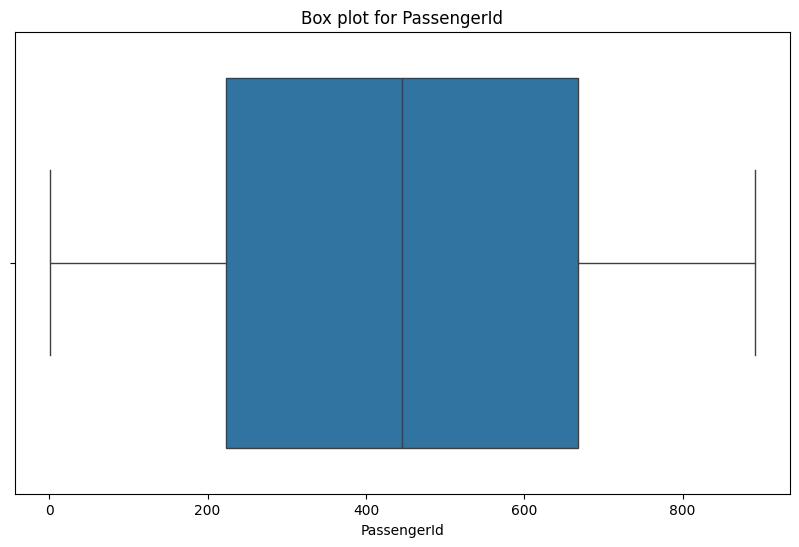

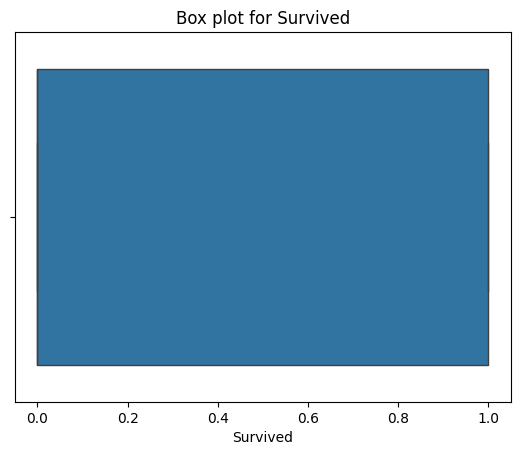

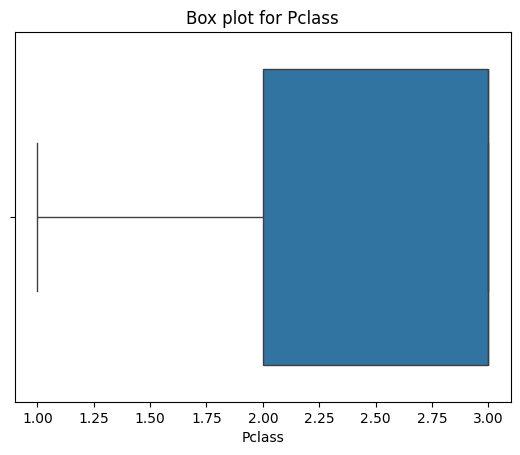

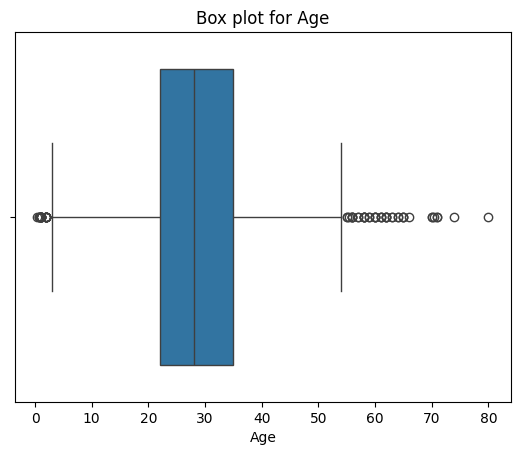

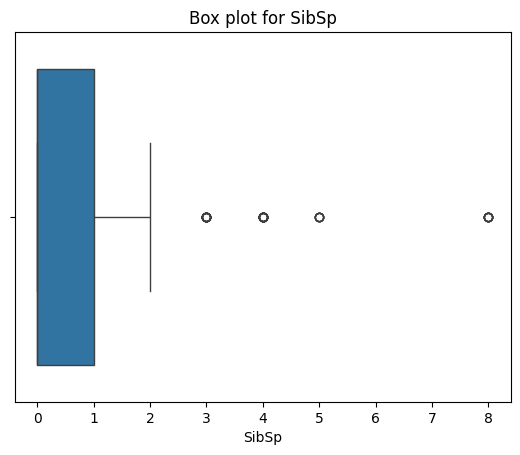

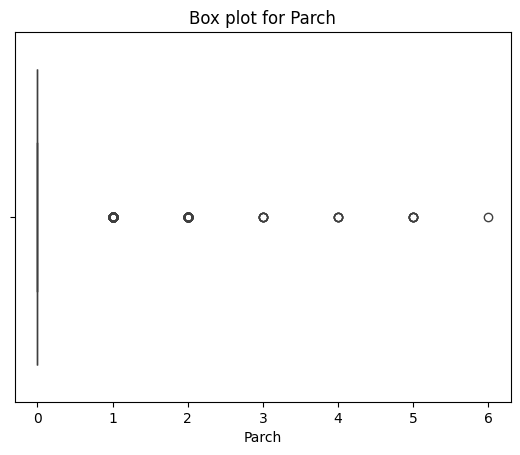

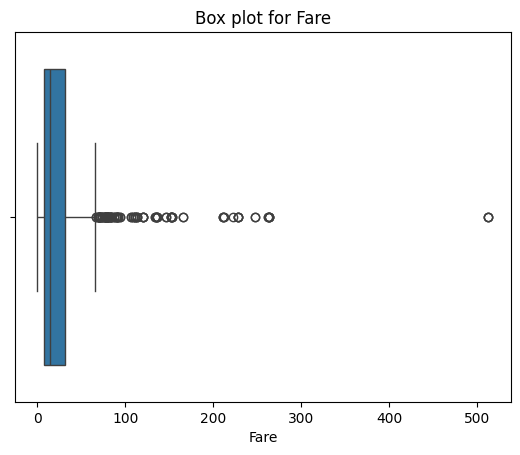

In [29]:
import matplotlib.pyplot as plt

# Plot box plots for numerical columns to visualize outliers
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))
for col in numerical_cols:
    sns.boxplot(x=train_df[col])
    plt.title(f'Box plot for {col}')
    plt.show()

In [30]:
# Function to count outliers using IQR method
def count_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

# Count and print outliers for each numerical column
for col in numerical_cols:
    outlier_count = count_outliers_iqr(train_df, col)
    print(f'Number of outliers in {col}: {outlier_count}')



Number of outliers in PassengerId: 0
Number of outliers in Survived: 0
Number of outliers in Pclass: 0
Number of outliers in Age: 66
Number of outliers in SibSp: 46
Number of outliers in Parch: 213
Number of outliers in Fare: 116


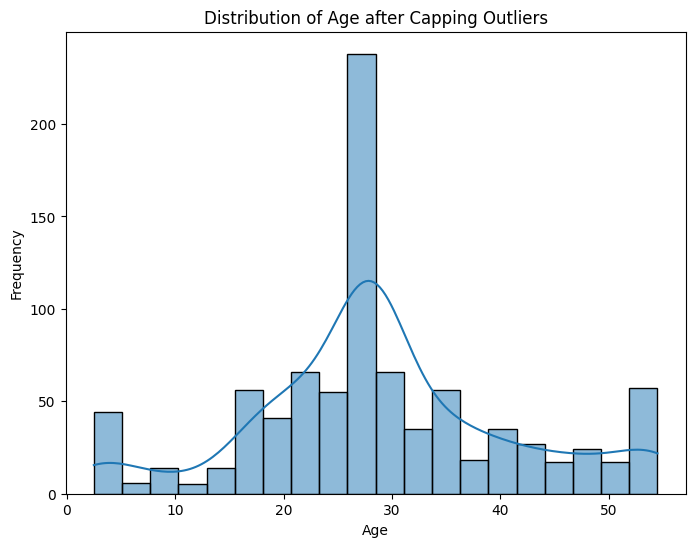

In [42]:
import matplotlib.pyplot as plt
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  return df

# Cap outliers in 'Age' column
train_df = cap_outliers_iqr(train_df, 'Age')

# Visualize 'Age' distribution after capping
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age after Capping Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

    Age AgeGroup
0  22.0    20-29
1  38.0    30-39
2  26.0    20-29
3  35.0    30-39
4  35.0    30-39


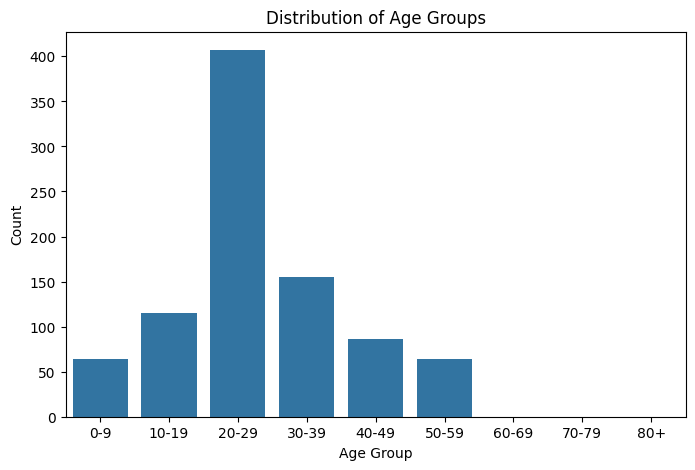

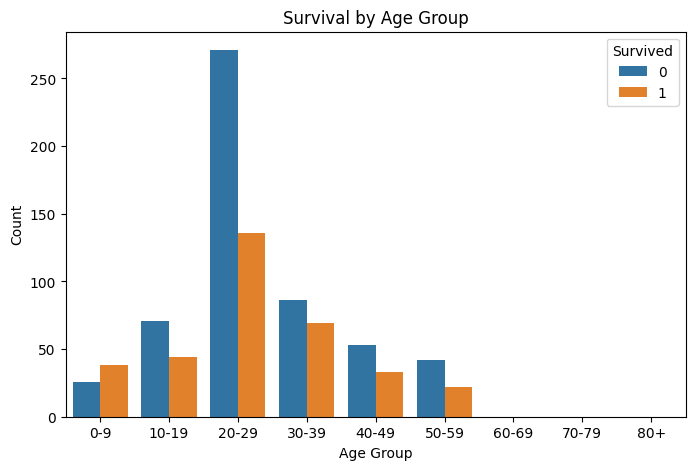

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define bins and labels for age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Create 'AgeGroup' column by binning
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, right=True)

# Display the first few rows
print(train_df[['Age', 'AgeGroup']].head())

# Visualize the distribution of 'AgeGroup'
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', data=train_df, order=age_labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Visualize survival by age group
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Survived', data=train_df, order=age_labels)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Drop the original 'Age' column (optional, test model performance first)
# train_df.drop('Age', axis=1, inplace=True)

In [33]:
# prompt: label encode agegroup

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'AgeGroup' column
train_df['AgeGroup_Encoded'] = label_encoder.fit_transform(train_df['AgeGroup'])

# Display the first few rows with the new encoded column
print(train_df[['AgeGroup', 'AgeGroup_Encoded']].head())

# Display the mapping between original and encoded labels
print("\nAge Group to Encoded Value Mapping:")
for i, label in enumerate(label_encoder.classes_):
  print(f"{label}: {i}")

  AgeGroup  AgeGroup_Encoded
0    20-29                 2
1    30-39                 3
2    20-29                 2
3    30-39                 3
4    30-39                 3

Age Group to Encoded Value Mapping:
0-9: 0
10-19: 1
20-29: 2
30-39: 3
40-49: 4
50-59: 5
60-69: 6
70-79: 7


In [34]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'AgeGroup_Encoded'],
      dtype='object')

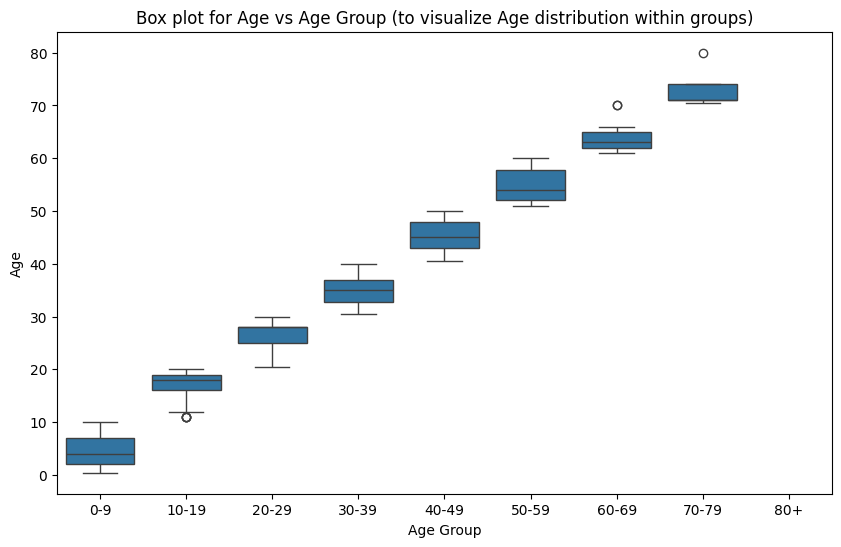

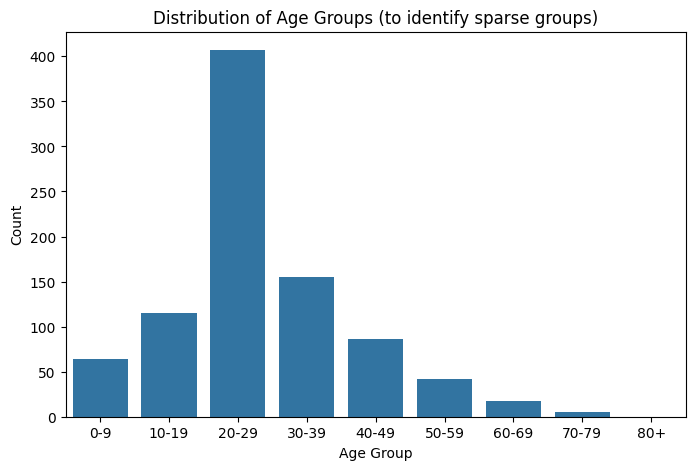

In [39]:
import matplotlib.pyplot as plt
# Visualize outliers in 'AgeGroup' using a box plot (although typically box plots are for numerical data)
# Since 'AgeGroup' is categorical, a different approach might be better for outliers (e.g., analyzing counts in sparse groups)
# However, if you want to visualize based on the order of the age groups:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='Age', data=train_df, order=age_labels)
plt.title('Box plot for Age vs Age Group (to visualize Age distribution within groups)')
plt.xlabel('Age Group')
plt.ylabel('Age')
plt.show()

# To check for 'outliers' in a categorical column like AgeGroup,
# you would typically look for groups with very few occurrences.
# A countplot is a better visualization for this:
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', data=train_df, order=age_labels)
plt.title('Distribution of Age Groups (to identify sparse groups)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Handling outliers for Fare


Column: Fare
Lower Bound: -26.72, Upper Bound: 65.63
Number of outliers in Fare: 0


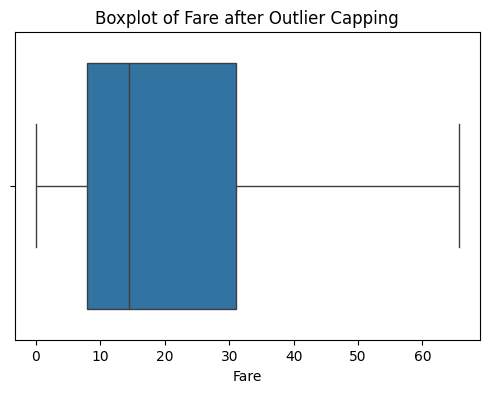


Column: SibSp
Lower Bound: -1.50, Upper Bound: 2.50
Number of outliers in SibSp: 0


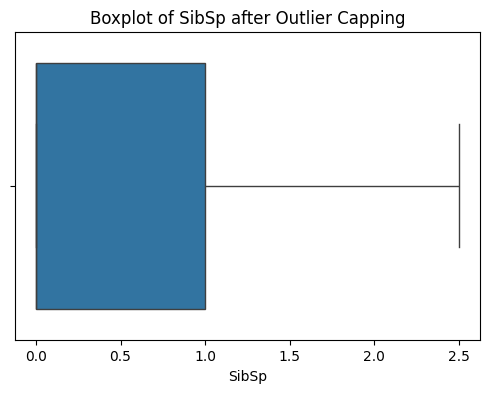


Column: Parch
Lower Bound: 0.00, Upper Bound: 0.00
Number of outliers in Parch: 213


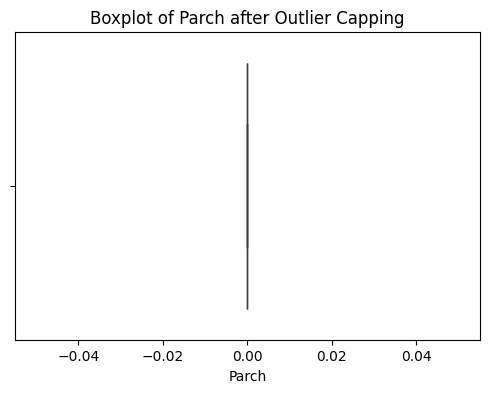

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (use your actual path or source)
# train_df = pd.read_csv('your_dataset.csv')

# Function to apply IQR-based capping to a column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {column}")
    print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {outliers.shape[0]}")

    # Apply capping
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

    # Optional: Plot boxplot after capping
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column} after Outlier Capping")
    plt.show()

# Apply to relevant columns
columns_to_cap = ['Fare', 'SibSp', 'Parch']
for col in columns_to_cap:
    cap_outliers(train_df, col)


In [46]:
# prompt: list outlier count for each column

# Count and print outliers for each numerical column
for col in numerical_cols:
  outlier_count = count_outliers_iqr(train_df, col)
  print(f'Number of outliers in {col}: {outlier_count}')

Number of outliers in PassengerId: 0
Number of outliers in Survived: 0
Number of outliers in Pclass: 0
Number of outliers in Age: 0
Number of outliers in SibSp: 0
Number of outliers in Parch: 0
Number of outliers in Fare: 0
